In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot 
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer, StandardScaler, OneHotEncoder
from sklearn import tree, neighbors, metrics, ensemble
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier

In [57]:
df_train= pd.read_csv('LFTS_train/train.csv')
df_test= pd.read_csv('LFTS_test.csv')

In [58]:
df_train['Employment.Type'].fillna(df_train['Employment.Type'].dropna().max(), inplace=True)
df_test['Employment.Type'].fillna(df_test['Employment.Type'].dropna().max(), inplace=True)

In [59]:
dob_train=pd.to_datetime(df_train['Date.of.Birth'],format='%d-%m-%y').dt.year
dob_test=pd.to_datetime(df_train['Date.of.Birth'],format='%d-%m-%y').dt.year
today=pd.to_datetime('today').year
df_train['Date.of.Birth']=today-dob_train
df_test['Date.of.Birth']=today-dob_test
df_train.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,35,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,34,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,34,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,26,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,42,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,29,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,31,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,30,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,28,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,-49,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [60]:
DisbursalDate_train=pd.to_datetime(df_train['DisbursalDate'])
DisbursalDate_test=pd.to_datetime(df_test['DisbursalDate'])
today=pd.to_datetime('today')
df_train['DisbursalDate']=(today-DisbursalDate_train).dt.days
df_test['DisbursalDate']=(today-DisbursalDate_test).dt.days

In [61]:
df_train.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,35,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,34,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,34,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,26,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,42,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,29,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,31,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,30,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,28,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,-49,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [62]:
train=df_train.drop(['PERFORM_CNS.SCORE.DESCRIPTION','UniqueID','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID','Employee_code_ID'], axis=1)
test=df_test.drop(['PERFORM_CNS.SCORE.DESCRIPTION','UniqueID','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID','Employee_code_ID'], axis=1)

In [63]:
train.head()

,disbursed_amount,asset_cost,ltv,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,35,Salaried,409,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,34,Self employed,207,1,1,0,0,...,0,0,0,0,1991,0,0,1,0,1
2,53278,61360,89.63,34,Self employed,468,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,26,Self employed,177,1,1,0,0,...,0,0,0,0,31,0,0,0,1,1
4,52378,60300,88.39,42,Self employed,207,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [64]:
test.head()

,disbursed_amount,asset_cost,ltv,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
0,53478,63558,86.54,35,Salaried,406,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55513,63163,89.45,34,Self employed,152,1,1,0,0,...,0,0,0,0,0,5605,0,1,0,1
2,65282,84320,79.93,34,Salaried,143,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,46905,63896,76.58,26,Self employed,143,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51428,63896,86.08,42,Salaried,155,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
le=LabelEncoder()
train['Employment.Type']=le.fit_transform(train['Employment.Type'])
test['Employment.Type']=le.fit_transform(test['Employment.Type'])

#converts categorical to one hot encoded
# one_hot_encoded_training_predictors = pd.get_dummies(train_x)
# one_hot_encoded_test_predictors = pd.get_dummies(test)
# train, test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
#                                                                     join='left', 
#                                                                     axis=1)

In [66]:
count_0, count_1=train['loan_default'].value_counts()
train_0=train[train['loan_default']==0]
train_1=train[train['loan_default']==1]

df_under=train_0.sample(count_1)
df_under=pd.concat([df_under, train_1], axis=0)
df_under['loan_default'].value_counts()
# df_over=train_1.sample(count_0, replace=True)
# df_over=pd.concat([df_over,train_0], axis=0)
# df_over['loan_default'].value_counts()

1    50611
0    50611
Name: loan_default, dtype: int64

In [67]:
# y_over=df_over['loan_default']
# x_over=df_over.drop('loan_default', axis=1)
y_under=df_under['loan_default']
x_under=df_under.drop('loan_default', axis=1)

In [68]:
#standard scaler on x and test
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_under)
# Apply transform to both the training set and the test set.
x_scale= scaler.transform(x_under)
# x_over_scale= scaler.transform(x_over_smote)
test = scaler.transform(test)

/Users/gagicha/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/gagicha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/gagicha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [69]:
# #pca
# pca = PCA(.95)
# pca.fit(x_under)
# x_pca = pca.transform(x_under)
# test = pca.transform(test)

In [70]:
# pca.n_components_

In [71]:
estimators=[ensemble.RandomForestClassifier(), xgb.XGBClassifier()]
scores=[]
for estimator in estimators:
    scores.append(cross_val_score(estimator, x_scale, y_under, cv=5).mean())

/Users/gagicha/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gagicha/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gagicha/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gagicha/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gagicha/anaconda/lib/python3.6/si

In [72]:
scores

[0.5522614998919728, 0.6009072502274582]

In [84]:
train_x, test_x, train_y, test_y= train_test_split(x_scale, y_under, test_size=0.33)

In [85]:
model=xgb.XGBClassifier(n_jobs=-1, n_estimators=700)
eval_metric = ["error","logloss",'auc']
eval_set = [(train_x, train_y), (test_x, test_y)]
model.fit(train_x, train_y, eval_metric=eval_metric , eval_set=eval_set)

[0]	validation_0-error:0.420287	validation_0-logloss:0.689794	validation_0-auc:0.602669	validation_1-error:0.420399	validation_1-logloss:0.689916	validation_1-auc:0.600001
[1]	validation_0-error:0.419417	validation_0-logloss:0.687036	validation_0-auc:0.603713	validation_1-error:0.420848	validation_1-logloss:0.687324	validation_1-auc:0.600045
[2]	validation_0-error:0.418119	validation_0-logloss:0.68474	validation_0-auc:0.608583	validation_1-error:0.420219	validation_1-logloss:0.685144	validation_1-auc:0.604101
[3]	validation_0-error:0.413961	validation_0-logloss:0.682763	validation_0-auc:0.611175	validation_1-error:0.417315	validation_1-logloss:0.683294	validation_1-auc:0.606805
[4]	validation_0-error:0.417146	validation_0-logloss:0.681016	validation_0-auc:0.615032	validation_1-error:0.418633	validation_1-logloss:0.681675	validation_1-auc:0.609897
[5]	validation_0-error:0.413238	validation_0-logloss:0.679573	validation_0-auc:0.616126	validation_1-error:0.416567	validation_1-logloss:0.68

[48]	validation_0-error:0.393376	validation_0-logloss:0.660138	validation_0-auc:0.646999	validation_1-error:0.40106	validation_1-logloss:0.664069	validation_1-auc:0.636509
[49]	validation_0-error:0.39289	validation_0-logloss:0.659917	validation_0-auc:0.647428	validation_1-error:0.40073	validation_1-logloss:0.663909	validation_1-auc:0.636795
[50]	validation_0-error:0.39314	validation_0-logloss:0.65974	validation_0-auc:0.64765	validation_1-error:0.400521	validation_1-logloss:0.663796	validation_1-auc:0.636943
[51]	validation_0-error:0.393185	validation_0-logloss:0.659618	validation_0-auc:0.647843	validation_1-error:0.400341	validation_1-logloss:0.663724	validation_1-auc:0.63705
[52]	validation_0-error:0.392816	validation_0-logloss:0.659469	validation_0-auc:0.648001	validation_1-error:0.400521	validation_1-logloss:0.66358	validation_1-auc:0.637217
[53]	validation_0-error:0.392669	validation_0-logloss:0.659315	validation_0-auc:0.648283	validation_1-error:0.400551	validation_1-logloss:0.663

[96]	validation_0-error:0.387758	validation_0-logloss:0.654886	validation_0-auc:0.655485	validation_1-error:0.397827	validation_1-logloss:0.661171	validation_1-auc:0.640835
[97]	validation_0-error:0.387862	validation_0-logloss:0.654775	validation_0-auc:0.655725	validation_1-error:0.397827	validation_1-logloss:0.661103	validation_1-auc:0.640998
[98]	validation_0-error:0.387729	validation_0-logloss:0.654714	validation_0-auc:0.655872	validation_1-error:0.397946	validation_1-logloss:0.661102	validation_1-auc:0.640986
[99]	validation_0-error:0.387729	validation_0-logloss:0.654644	validation_0-auc:0.656009	validation_1-error:0.397976	validation_1-logloss:0.66109	validation_1-auc:0.64099
[100]	validation_0-error:0.387567	validation_0-logloss:0.654592	validation_0-auc:0.656106	validation_1-error:0.397946	validation_1-logloss:0.661076	validation_1-auc:0.640996
[101]	validation_0-error:0.387567	validation_0-logloss:0.654561	validation_0-auc:0.656163	validation_1-error:0.397916	validation_1-loglo

[144]	validation_0-error:0.385384	validation_0-logloss:0.652027	validation_0-auc:0.660481	validation_1-error:0.39639	validation_1-logloss:0.660391	validation_1-auc:0.642115
[145]	validation_0-error:0.38537	validation_0-logloss:0.651976	validation_0-auc:0.660547	validation_1-error:0.396569	validation_1-logloss:0.660412	validation_1-auc:0.642058
[146]	validation_0-error:0.385266	validation_0-logloss:0.651952	validation_0-auc:0.660564	validation_1-error:0.396779	validation_1-logloss:0.660393	validation_1-auc:0.642095
[147]	validation_0-error:0.38506	validation_0-logloss:0.651901	validation_0-auc:0.660677	validation_1-error:0.396569	validation_1-logloss:0.660399	validation_1-auc:0.642086
[148]	validation_0-error:0.384898	validation_0-logloss:0.651845	validation_0-auc:0.660762	validation_1-error:0.396629	validation_1-logloss:0.660359	validation_1-auc:0.642146
[149]	validation_0-error:0.384957	validation_0-logloss:0.651824	validation_0-auc:0.660798	validation_1-error:0.396569	validation_1-lo

[192]	validation_0-error:0.382081	validation_0-logloss:0.649706	validation_0-auc:0.664544	validation_1-error:0.395013	validation_1-logloss:0.660034	validation_1-auc:0.642833
[193]	validation_0-error:0.382052	validation_0-logloss:0.649687	validation_0-auc:0.664575	validation_1-error:0.395013	validation_1-logloss:0.66003	validation_1-auc:0.642842
[194]	validation_0-error:0.381919	validation_0-logloss:0.649618	validation_0-auc:0.6647	validation_1-error:0.395192	validation_1-logloss:0.659999	validation_1-auc:0.642911
[195]	validation_0-error:0.38189	validation_0-logloss:0.649573	validation_0-auc:0.664774	validation_1-error:0.395222	validation_1-logloss:0.66	validation_1-auc:0.642906
[196]	validation_0-error:0.381831	validation_0-logloss:0.649554	validation_0-auc:0.664802	validation_1-error:0.395072	validation_1-logloss:0.660007	validation_1-auc:0.642892
[197]	validation_0-error:0.381772	validation_0-logloss:0.649524	validation_0-auc:0.664856	validation_1-error:0.395072	validation_1-logloss

[240]	validation_0-error:0.379929	validation_0-logloss:0.647654	validation_0-auc:0.668197	validation_1-error:0.394653	validation_1-logloss:0.659797	validation_1-auc:0.643566
[241]	validation_0-error:0.379929	validation_0-logloss:0.647643	validation_0-auc:0.668204	validation_1-error:0.394623	validation_1-logloss:0.659796	validation_1-auc:0.643576
[242]	validation_0-error:0.379825	validation_0-logloss:0.647608	validation_0-auc:0.668267	validation_1-error:0.394623	validation_1-logloss:0.659794	validation_1-auc:0.64358
[243]	validation_0-error:0.379825	validation_0-logloss:0.647594	validation_0-auc:0.668288	validation_1-error:0.394564	validation_1-logloss:0.659797	validation_1-auc:0.643577
[244]	validation_0-error:0.379589	validation_0-logloss:0.647508	validation_0-auc:0.668477	validation_1-error:0.394414	validation_1-logloss:0.65974	validation_1-auc:0.643724
[245]	validation_0-error:0.379545	validation_0-logloss:0.647447	validation_0-auc:0.668555	validation_1-error:0.394174	validation_1-l

[288]	validation_0-error:0.377702	validation_0-logloss:0.645895	validation_0-auc:0.67131	validation_1-error:0.394294	validation_1-logloss:0.659662	validation_1-auc:0.643831
[289]	validation_0-error:0.377614	validation_0-logloss:0.645878	validation_0-auc:0.671338	validation_1-error:0.394234	validation_1-logloss:0.659667	validation_1-auc:0.643829
[290]	validation_0-error:0.377555	validation_0-logloss:0.645841	validation_0-auc:0.671406	validation_1-error:0.394324	validation_1-logloss:0.659664	validation_1-auc:0.643836
[291]	validation_0-error:0.37751	validation_0-logloss:0.645827	validation_0-auc:0.671428	validation_1-error:0.394294	validation_1-logloss:0.659658	validation_1-auc:0.643846
[292]	validation_0-error:0.377569	validation_0-logloss:0.64578	validation_0-auc:0.671488	validation_1-error:0.394204	validation_1-logloss:0.659645	validation_1-auc:0.643848
[293]	validation_0-error:0.377628	validation_0-logloss:0.645707	validation_0-auc:0.671596	validation_1-error:0.393785	validation_1-lo

[336]	validation_0-error:0.375933	validation_0-logloss:0.6442	validation_0-auc:0.67433	validation_1-error:0.394653	validation_1-logloss:0.65973	validation_1-auc:0.643856
[337]	validation_0-error:0.375903	validation_0-logloss:0.64419	validation_0-auc:0.674345	validation_1-error:0.394713	validation_1-logloss:0.65973	validation_1-auc:0.643857
[338]	validation_0-error:0.375888	validation_0-logloss:0.644177	validation_0-auc:0.674362	validation_1-error:0.394683	validation_1-logloss:0.659731	validation_1-auc:0.643867
[339]	validation_0-error:0.375903	validation_0-logloss:0.644156	validation_0-auc:0.674381	validation_1-error:0.394713	validation_1-logloss:0.659739	validation_1-auc:0.643862
[340]	validation_0-error:0.37577	validation_0-logloss:0.644114	validation_0-auc:0.674451	validation_1-error:0.394534	validation_1-logloss:0.659736	validation_1-auc:0.643905
[341]	validation_0-error:0.375815	validation_0-logloss:0.644049	validation_0-auc:0.674533	validation_1-error:0.394593	validation_1-loglos

[384]	validation_0-error:0.374089	validation_0-logloss:0.642586	validation_0-auc:0.677174	validation_1-error:0.394444	validation_1-logloss:0.659725	validation_1-auc:0.644078
[385]	validation_0-error:0.374089	validation_0-logloss:0.642581	validation_0-auc:0.677178	validation_1-error:0.394444	validation_1-logloss:0.659728	validation_1-auc:0.644079
[386]	validation_0-error:0.374104	validation_0-logloss:0.642559	validation_0-auc:0.67721	validation_1-error:0.394474	validation_1-logloss:0.659728	validation_1-auc:0.64408
[387]	validation_0-error:0.374075	validation_0-logloss:0.642551	validation_0-auc:0.677217	validation_1-error:0.394564	validation_1-logloss:0.659724	validation_1-auc:0.644091
[388]	validation_0-error:0.374119	validation_0-logloss:0.642513	validation_0-auc:0.677272	validation_1-error:0.394444	validation_1-logloss:0.659714	validation_1-auc:0.644125
[389]	validation_0-error:0.373927	validation_0-logloss:0.642471	validation_0-auc:0.677366	validation_1-error:0.394444	validation_1-l

[432]	validation_0-error:0.372232	validation_0-logloss:0.640989	validation_0-auc:0.67995	validation_1-error:0.394803	validation_1-logloss:0.659756	validation_1-auc:0.644073
[433]	validation_0-error:0.372232	validation_0-logloss:0.64098	validation_0-auc:0.679967	validation_1-error:0.394803	validation_1-logloss:0.659758	validation_1-auc:0.644074
[434]	validation_0-error:0.372084	validation_0-logloss:0.640939	validation_0-auc:0.680041	validation_1-error:0.395102	validation_1-logloss:0.659768	validation_1-auc:0.644054
[435]	validation_0-error:0.372143	validation_0-logloss:0.640903	validation_0-auc:0.680082	validation_1-error:0.395043	validation_1-logloss:0.659763	validation_1-auc:0.644075
[436]	validation_0-error:0.372114	validation_0-logloss:0.640873	validation_0-auc:0.680136	validation_1-error:0.395072	validation_1-logloss:0.659762	validation_1-auc:0.644078
[437]	validation_0-error:0.371937	validation_0-logloss:0.640833	validation_0-auc:0.680231	validation_1-error:0.395192	validation_1-l

[480]	validation_0-error:0.370447	validation_0-logloss:0.639556	validation_0-auc:0.682519	validation_1-error:0.395072	validation_1-logloss:0.659884	validation_1-auc:0.644021
[481]	validation_0-error:0.370433	validation_0-logloss:0.639524	validation_0-auc:0.682563	validation_1-error:0.395043	validation_1-logloss:0.659894	validation_1-auc:0.644015
[482]	validation_0-error:0.370315	validation_0-logloss:0.639481	validation_0-auc:0.682664	validation_1-error:0.395132	validation_1-logloss:0.65987	validation_1-auc:0.644063
[483]	validation_0-error:0.370403	validation_0-logloss:0.63944	validation_0-auc:0.682727	validation_1-error:0.394893	validation_1-logloss:0.659865	validation_1-auc:0.644062
[484]	validation_0-error:0.370477	validation_0-logloss:0.639411	validation_0-auc:0.682781	validation_1-error:0.394953	validation_1-logloss:0.659865	validation_1-auc:0.644052
[485]	validation_0-error:0.370462	validation_0-logloss:0.639401	validation_0-auc:0.682797	validation_1-error:0.394953	validation_1-l

[528]	validation_0-error:0.368722	validation_0-logloss:0.638022	validation_0-auc:0.685149	validation_1-error:0.394923	validation_1-logloss:0.660033	validation_1-auc:0.643889
[529]	validation_0-error:0.368575	validation_0-logloss:0.637982	validation_0-auc:0.6852	validation_1-error:0.394893	validation_1-logloss:0.660025	validation_1-auc:0.643909
[530]	validation_0-error:0.368457	validation_0-logloss:0.63794	validation_0-auc:0.685283	validation_1-error:0.394953	validation_1-logloss:0.660031	validation_1-auc:0.643908
[531]	validation_0-error:0.368501	validation_0-logloss:0.637899	validation_0-auc:0.685361	validation_1-error:0.395013	validation_1-logloss:0.660037	validation_1-auc:0.643914
[532]	validation_0-error:0.368368	validation_0-logloss:0.637865	validation_0-auc:0.685401	validation_1-error:0.395043	validation_1-logloss:0.660019	validation_1-auc:0.643966
[533]	validation_0-error:0.368413	validation_0-logloss:0.637855	validation_0-auc:0.68542	validation_1-error:0.395132	validation_1-log

[576]	validation_0-error:0.366289	validation_0-logloss:0.636474	validation_0-auc:0.687961	validation_1-error:0.39612	validation_1-logloss:0.660041	validation_1-auc:0.644117
[577]	validation_0-error:0.36626	validation_0-logloss:0.636439	validation_0-auc:0.688008	validation_1-error:0.39618	validation_1-logloss:0.660033	validation_1-auc:0.644136
[578]	validation_0-error:0.366333	validation_0-logloss:0.636407	validation_0-auc:0.68806	validation_1-error:0.39609	validation_1-logloss:0.660042	validation_1-auc:0.644101
[579]	validation_0-error:0.366348	validation_0-logloss:0.636384	validation_0-auc:0.688097	validation_1-error:0.39615	validation_1-logloss:0.660039	validation_1-auc:0.6441
[580]	validation_0-error:0.366348	validation_0-logloss:0.636381	validation_0-auc:0.688097	validation_1-error:0.39615	validation_1-logloss:0.660042	validation_1-auc:0.644101
[581]	validation_0-error:0.366333	validation_0-logloss:0.636358	validation_0-auc:0.688143	validation_1-error:0.39612	validation_1-logloss:0

[624]	validation_0-error:0.364417	validation_0-logloss:0.635076	validation_0-auc:0.690314	validation_1-error:0.39627	validation_1-logloss:0.66019	validation_1-auc:0.64406
[625]	validation_0-error:0.364402	validation_0-logloss:0.635057	validation_0-auc:0.690345	validation_1-error:0.39621	validation_1-logloss:0.660201	validation_1-auc:0.644047
[626]	validation_0-error:0.364402	validation_0-logloss:0.635045	validation_0-auc:0.690365	validation_1-error:0.39618	validation_1-logloss:0.660217	validation_1-auc:0.644019
[627]	validation_0-error:0.364284	validation_0-logloss:0.63502	validation_0-auc:0.690402	validation_1-error:0.39621	validation_1-logloss:0.66022	validation_1-auc:0.644016
[628]	validation_0-error:0.364343	validation_0-logloss:0.634993	validation_0-auc:0.690458	validation_1-error:0.39612	validation_1-logloss:0.660226	validation_1-auc:0.643988
[629]	validation_0-error:0.364313	validation_0-logloss:0.63495	validation_0-auc:0.690549	validation_1-error:0.39609	validation_1-logloss:0.

[672]	validation_0-error:0.36306	validation_0-logloss:0.633802	validation_0-auc:0.692524	validation_1-error:0.3963	validation_1-logloss:0.660385	validation_1-auc:0.64398
[673]	validation_0-error:0.36303	validation_0-logloss:0.633781	validation_0-auc:0.692569	validation_1-error:0.39639	validation_1-logloss:0.660391	validation_1-auc:0.643971
[674]	validation_0-error:0.363016	validation_0-logloss:0.633751	validation_0-auc:0.692622	validation_1-error:0.39645	validation_1-logloss:0.660405	validation_1-auc:0.643931
[675]	validation_0-error:0.362971	validation_0-logloss:0.633728	validation_0-auc:0.692657	validation_1-error:0.396479	validation_1-logloss:0.660421	validation_1-auc:0.643913
[676]	validation_0-error:0.362927	validation_0-logloss:0.633711	validation_0-auc:0.692679	validation_1-error:0.396539	validation_1-logloss:0.660429	validation_1-auc:0.643903
[677]	validation_0-error:0.362927	validation_0-logloss:0.633704	validation_0-auc:0.692686	validation_1-error:0.396539	validation_1-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [86]:
results=model.evals_result()

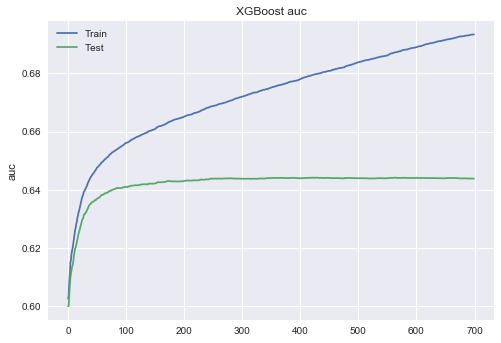

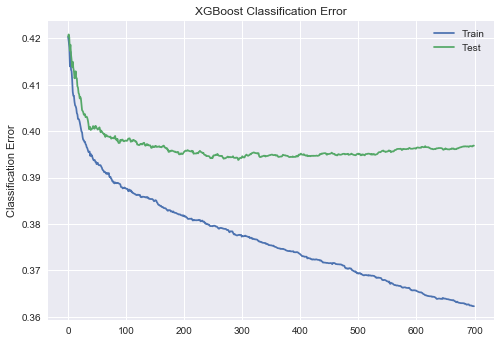

In [87]:
epochs=len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('auc')
pyplot.title('XGBoost auc')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

after 50 epochs, the accuracy is noot increasing much. so let n_iterations=50

In [77]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch1.fit(x_scale, y_under)
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [78]:
gsearch1.best_params_

{'max_depth': 5, 'min_child_weight': 1}

In [88]:
xgb_model=xgb.XGBClassifier(n_estimators=50, max_depth=5, min_child_weight=3)
eval_set = [(train_x, train_y), (test_x, test_y)]
xgb_model.fit(train_x, train_y, eval_metric='auc',eval_set=eval_set)

[0]	validation_0-auc:0.620869	validation_1-auc:0.612624
[1]	validation_0-auc:0.623755	validation_1-auc:0.614543
[2]	validation_0-auc:0.62936	validation_1-auc:0.619115
[3]	validation_0-auc:0.631764	validation_1-auc:0.621007
[4]	validation_0-auc:0.633791	validation_1-auc:0.622887
[5]	validation_0-auc:0.635112	validation_1-auc:0.623844
[6]	validation_0-auc:0.636075	validation_1-auc:0.624925
[7]	validation_0-auc:0.63728	validation_1-auc:0.62572
[8]	validation_0-auc:0.638123	validation_1-auc:0.626149
[9]	validation_0-auc:0.639407	validation_1-auc:0.627099
[10]	validation_0-auc:0.640509	validation_1-auc:0.627888
[11]	validation_0-auc:0.641669	validation_1-auc:0.628386
[12]	validation_0-auc:0.643375	validation_1-auc:0.629826
[13]	validation_0-auc:0.645201	validation_1-auc:0.630919
[14]	validation_0-auc:0.646135	validation_1-auc:0.631774
[15]	validation_0-auc:0.647331	validation_1-auc:0.632432
[16]	validation_0-auc:0.648114	validation_1-auc:0.633047
[17]	validation_0-auc:0.649111	validation_1-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [89]:
print('acc: ',xgb_model.score(test_x, test_y))
pred_xgb= xgb_model.predict(test_x)
print('auc: ',metrics.roc_auc_score(test_y, pred_xgb))
print(metrics.confusion_matrix(test_y, pred_xgb))

acc:  0.6034307268590587
auc:  0.6035572356457318
[[ 9303  7443]
 [ 5804 10854]]


In [90]:
out=pd.concat([df_test['UniqueID'], pd.DataFrame(xgb_model.predict(test),columns=['loan_default'])], axis=1)

In [91]:
out.head(15)

,UniqueID,loan_default
0,655269,1
1,723482,1
2,758529,0
3,763449,1
4,708663,1
5,725530,1
6,708592,1
7,714975,1
8,712795,1
9,708656,0


In [92]:
out.to_csv('loan_predict.csv', encoding='utf-8', index=False)